In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


C:\Users\arnim\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\arnim\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


KeyboardInterrupt: 

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1 
)
train_generator = train_datagen.flow_from_directory(
    'cropped',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    'cropped', 
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

In [12]:
IMG_SIZE=(128,128)
conv_base = ResNet50(
    include_top=False,
    input_shape=IMG_SIZE + (3,),
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = True

In [18]:
model = conv_base.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.4)(model)
model = Dense(4, activation="softmax")(model)
model = Model(inputs=conv_base.input, outputs=model)
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=validation_generator.samples // 32
)


Epoch 1/10
160/160 [==============================] - 446s 3s/step - loss: 0.4338 - accuracy: 0.8392 - val_loss: 3.0828 - val_accuracy: 0.2482
Epoch 2/10
160/160 [==============================] - 461s 3s/step - loss: 0.2040 - accuracy: 0.9284 - val_loss: 1.5308 - val_accuracy: 0.2592
Epoch 3/10
160/160 [==============================] - 524s 3s/step - loss: 0.1476 - accuracy: 0.9462 - val_loss: 2.7092 - val_accuracy: 0.2757
Epoch 4/10
160/160 [==============================] - 870s 5s/step - loss: 0.1178 - accuracy: 0.9583 - val_loss: 1.5424 - val_accuracy: 0.4320
Epoch 5/10
160/160 [==============================] - 815s 5s/step - loss: 0.0927 - accuracy: 0.9685 - val_loss: 1.0277 - val_accuracy: 0.6581
Epoch 6/10
160/160 [==============================] - 785s 5s/step - loss: 0.0918 - accuracy: 0.9710 - val_loss: 0.6456 - val_accuracy: 0.7868
Epoch 7/10
160/160 [==============================] - 718s 4s/step - loss: 0.0631 - accuracy: 0.9804 - val_loss: 0.2905 - val_accuracy: 0.9007

In [20]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


18/18 [==============================] - 16s 846ms/step - loss: 0.4538 - accuracy: 0.8752
Validation Accuracy: 87.52%


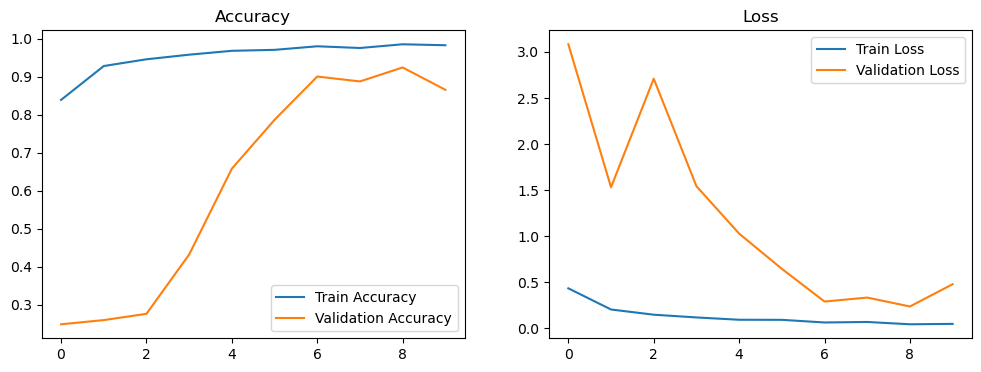

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [22]:
model.save('brain_tumor_resnet50.h5')
